In [5]:
import pandas as pd

ev_data=pd.read_csv('C:/Users/vinay/Downloads/evdata.csv')

In [6]:
print("number of records",len(ev_data))




number of records 177866


In [7]:
ev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

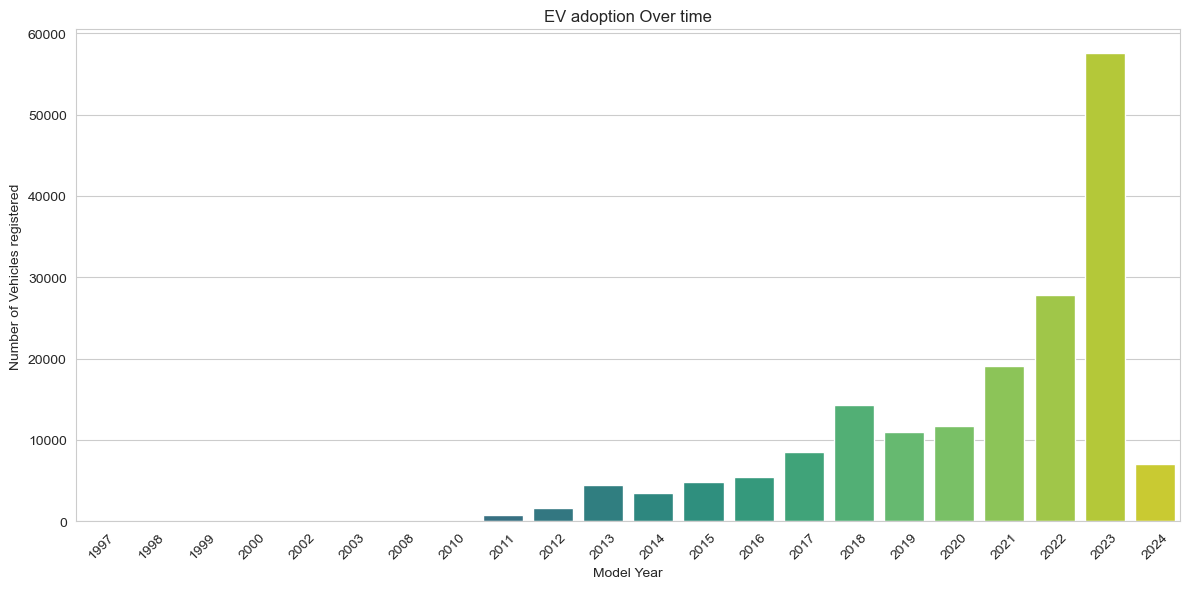

In [10]:
plt.figure(figsize=(12,6))
ev_adoption_by_year= ev_data['Model Year'].value_counts().sort_index()
# print(ev_adoption_by_year)
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values,palette="viridis")

plt.title('EV adoption Over time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

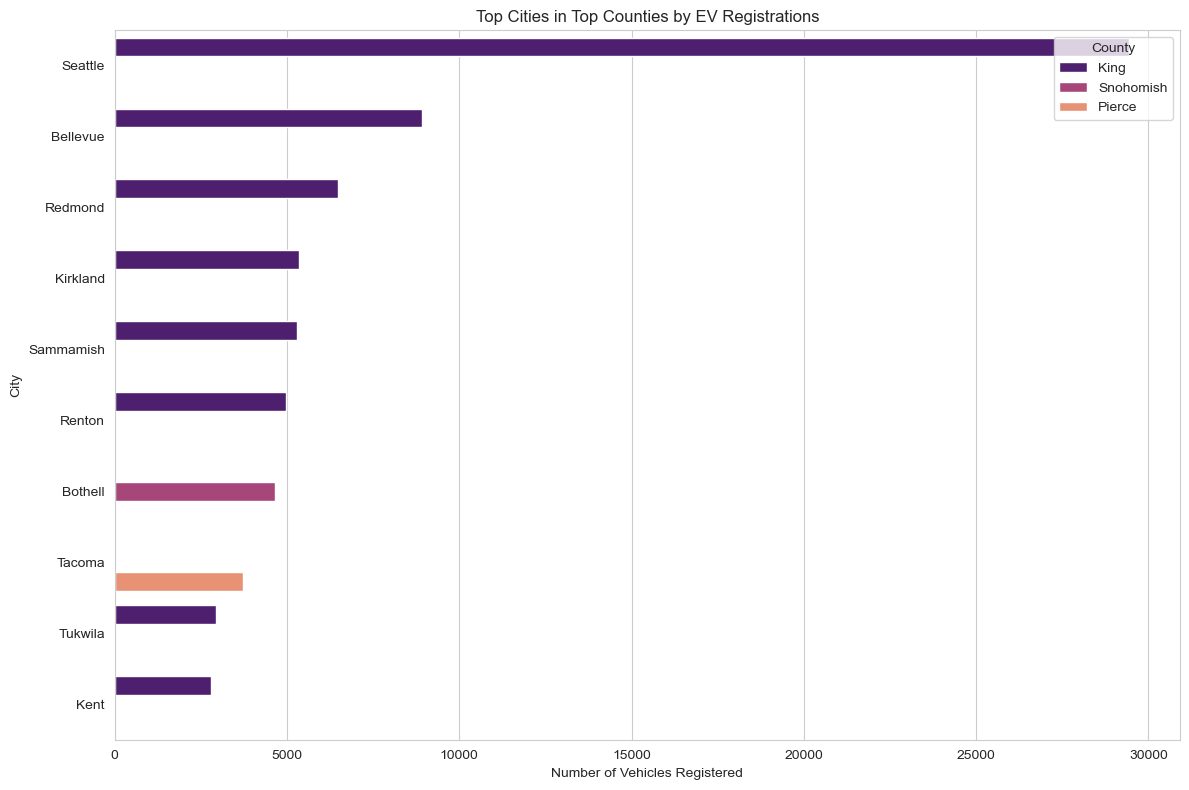

In [11]:
 #geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

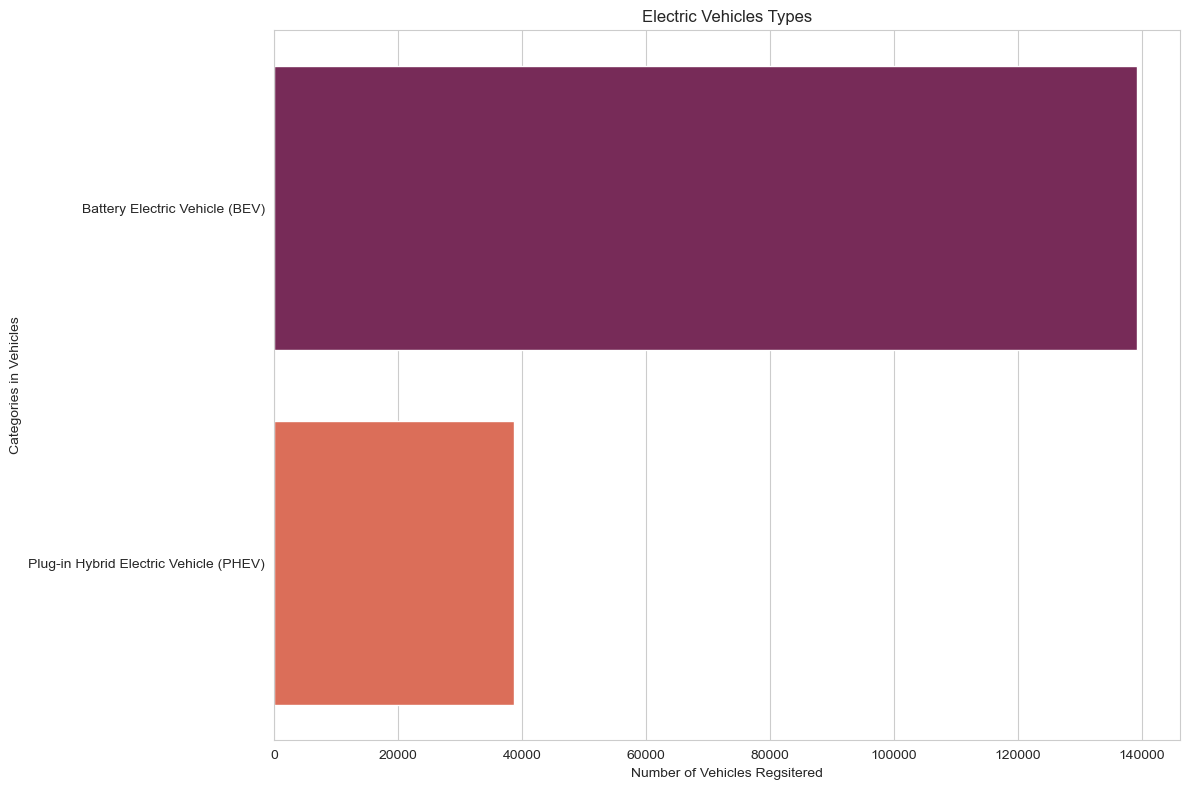

In [12]:
ev_data_vehicle_type=ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=ev_data_vehicle_type.values, y=ev_data_vehicle_type.index, palette='rocket')
plt.title('Electric Vehicles Types')
plt.xlabel('Number of Vehicles Regsitered')
plt.ylabel('Categories in Vehicles')
plt.tight_layout()
plt.show()



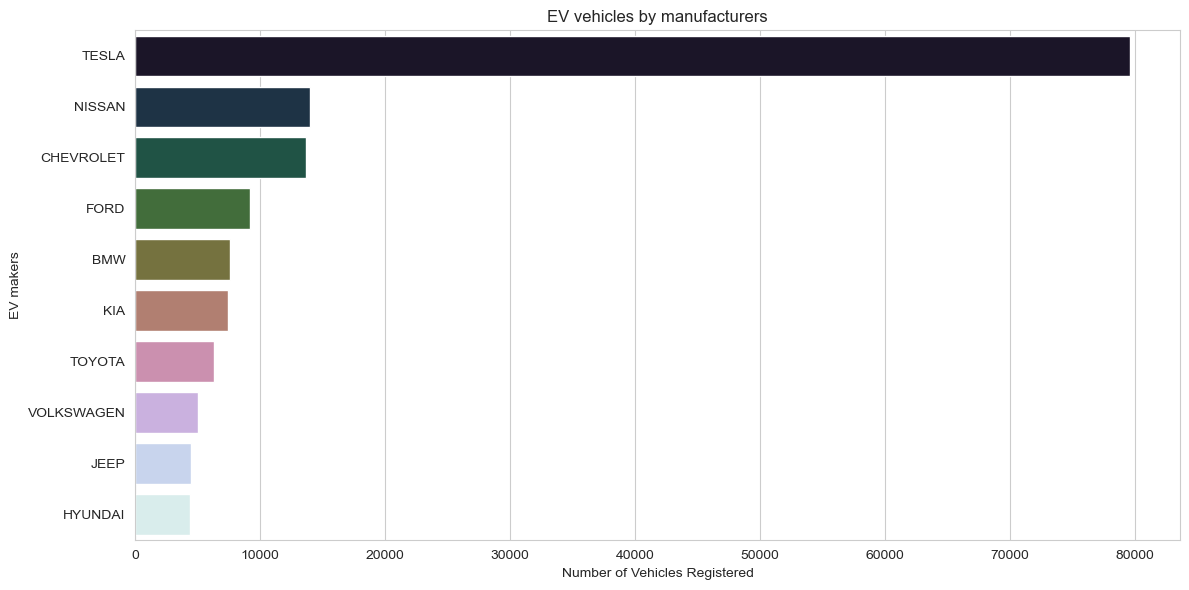

In [13]:
ev_make_distribution= ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index,palette="cubehelix")
plt.title("EV vehicles by manufacturers")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel('EV makers')
plt.tight_layout()
plt.show()



        Make     Model  Number of Vehicles
0      TESLA   MODEL Y               35989
1      TESLA   MODEL 3               30092
2     NISSAN      LEAF               13366
3      TESLA   MODEL S                7735
4  CHEVROLET   BOLT EV                6821
5      TESLA   MODEL X                5796
6  CHEVROLET      VOLT                4796
7  CHEVROLET  BOLT EUV                1772
8     NISSAN     ARIYA                 632
9  CHEVROLET     SPARK                 241


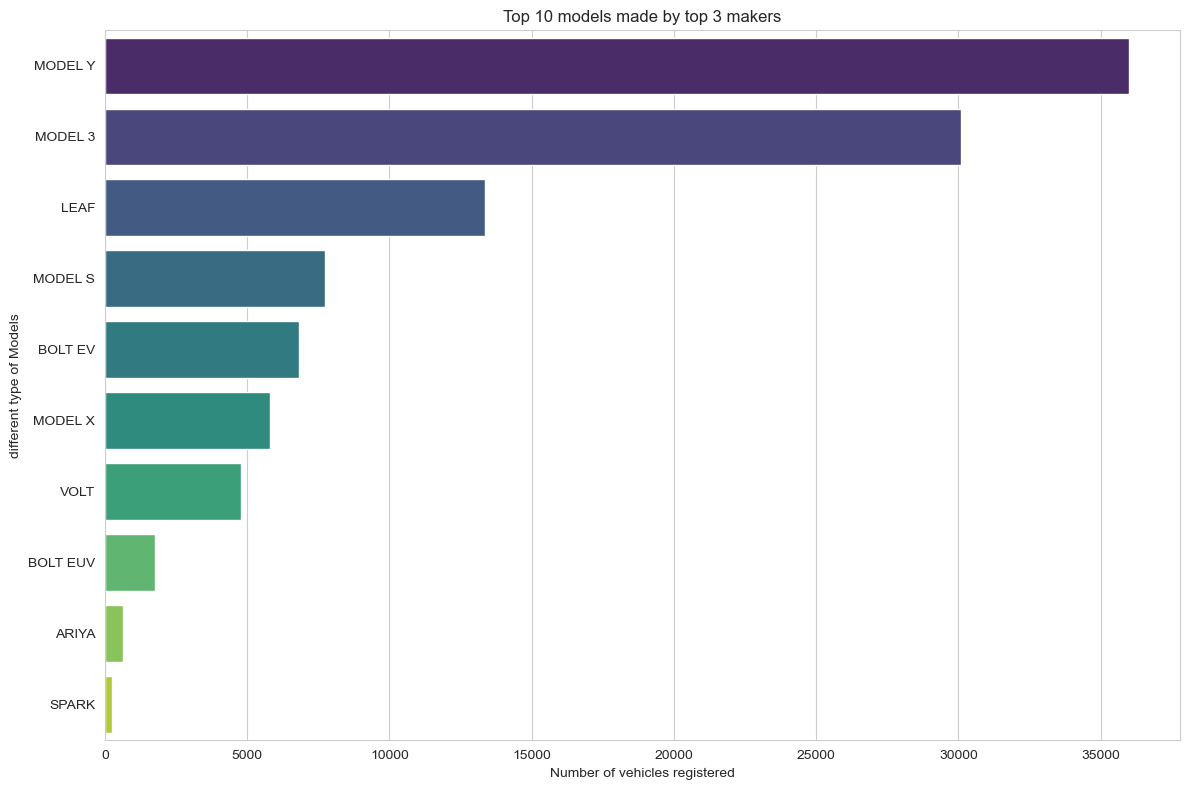

In [14]:
top_3_makes = ev_make_distribution.head(3).index

selecting_matched_rows=ev_data[ev_data['Make'].isin(top_3_makes)]

group_by=selecting_matched_rows.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_10_models=group_by.head(10)

print(top_10_models)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='Model',data=top_10_models,palette='viridis')
plt.title('Top 10 models made by top 3 makers')
plt.xlabel('Number of vehicles registered')
plt.ylabel('different type of Models')
plt.tight_layout()
plt.show()



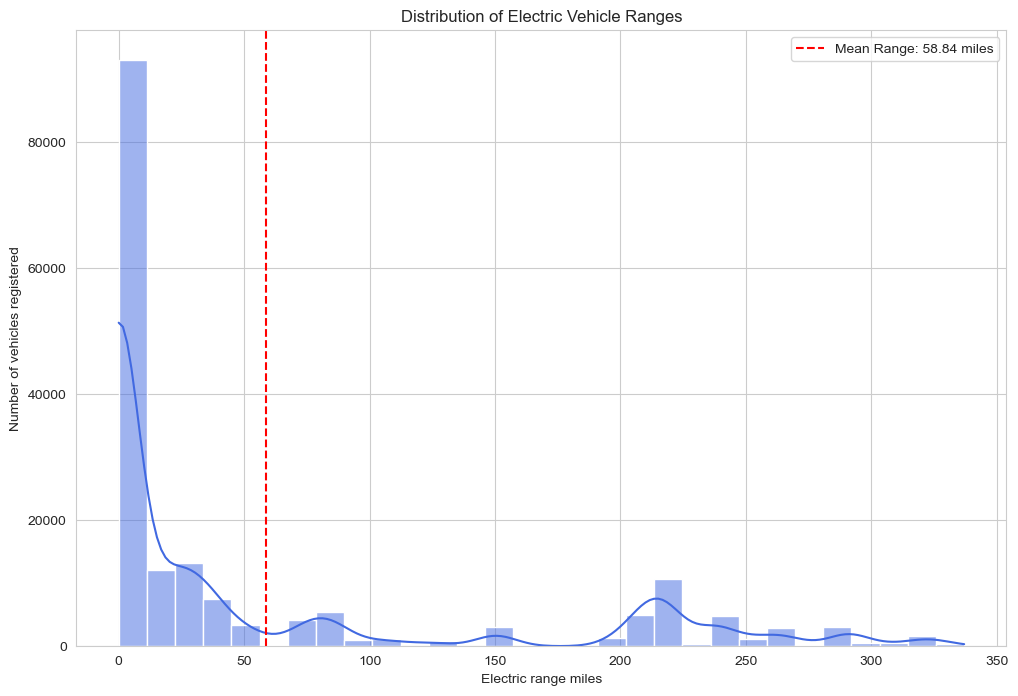

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric range miles')
plt.ylabel('Number of vehicles registered')
plt.axvline(ev_data['Electric Range'].mean(), color='red',linestyle='--',label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

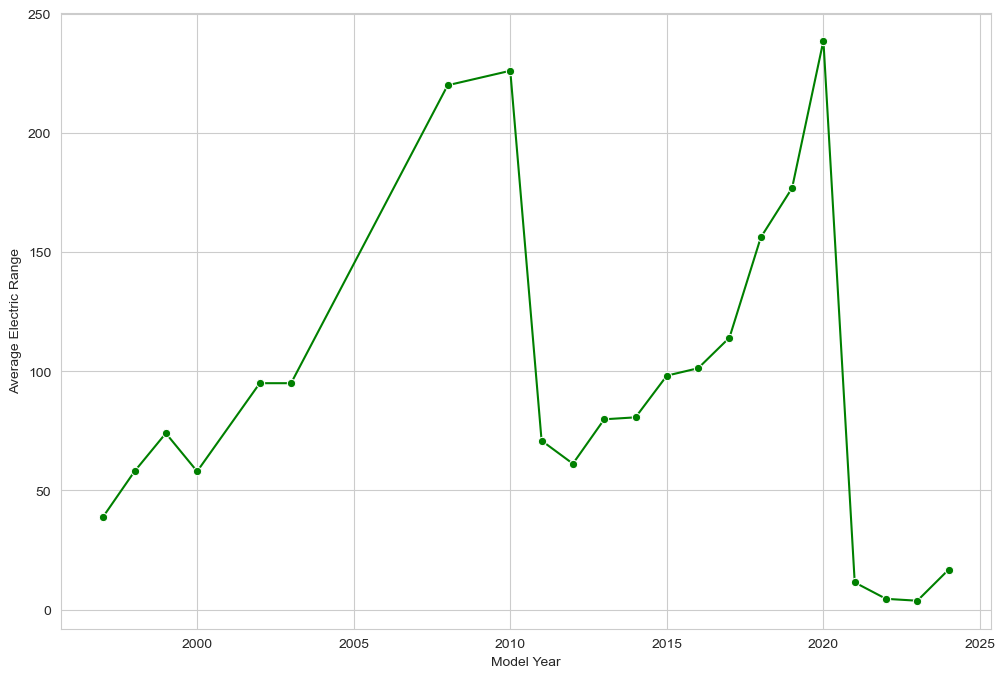

In [33]:
average_range=ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(x='Model Year',y='Electric Range',data=average_range, marker='o',color='green')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.show()


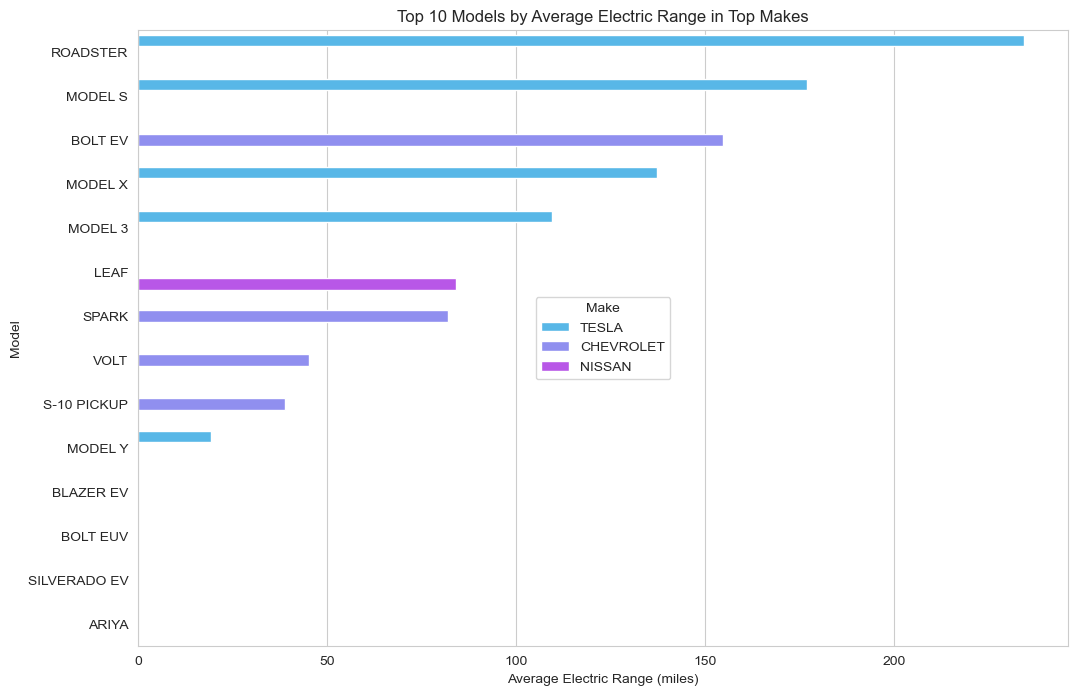

In [45]:
top_3_makes_average= selecting_matched_rows.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_3_makes_average,palette='cool')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center')
plt.show()

